# Clase 10: CORPUS

## 1. ¿Qué es un corpus, exactamente?

Es práctico empezar comentando un poco las diferentes definiciones de corpus con las que nos podemos topar dependiendo de qué material estemos leyendo. Una primera idea a tener presente es que el trabajo que hagamos sobre un corpus es cualitativamente distinto del que hacemos sobre textos individuales. Hasta ahora en las clases venimos trabajando distintas herramientas que son aplicables para procesar un texto. Las herramientas que usemos para trabajar con corpora a veces van a ser las mismas, a veces no, pero lo importante es que la perspectiva de análisis es diferente.


### 1.1. Perspectivas lingüística _vs._ perspectiva de minería de datos

Dependiendo del trabajo que estemos tratando de hacer, probablemente vayamos a estar oscilando entre dos conceptualizaciones diferentes de lo que es un corpus. Para trabajar desde una perspectiva fundamentalmente lingüística, la idea de corpus es que se trata de **una colección de discursos orales o escritos que fueron producidos en un contexto comunicativo natural**, y se los compila con la intención de que sean **representativos y balanceados respecto de una variedad, o registro, o tipo textual**. Las restricciones sobre la representatividad y el balance son un aspecto fundamental para poder trabajar con corpora desde una perspectiva lingüística: las conclusiones que se saquen del análisis de un corpus sólo van a ser tan generalizables como representativo sea el corpus, y la propia recolección del corpus va a estar guiada fundamentalmente por la necesidad de dar cuenta del comportamiento de un conjunto de fenómenos lingüísticos asociados a variedades determinadas.

Esta perpectiva difiere de una perspectiva de minería de texto pensando en que la recolección de documentos para extracción de información no supone la toma de muestras con el propósito de dar cuenta de fenómenos lingüísticos, sino de situaciones extralingüísticas que, **desafortunadamente** terminaron siendo codificadas en forma de texto. Lo desafortunado tiene que ver con que la diferencia más importante entre una base de datos de texto y bases de datos de otro tipo pasa por el grado de estructura de la información: el texto es un tipo de dato muy desestructurado, y en el proceso de extracción de información el objetivo es transformarlo a algún formato con un nivel de estructura mayor que permita un análisis sistemático en términos de variables que den cuenta del fenómeno extralingüístico de interés.

Sin embargo, esto no quiere decir que el análisis lingüístico no se beneficie de incorporar estructura al texto ni que la minería de datos no necesite de datos representativos, de hecho la situación es probablemente la opuesta. Tampoco quiere decir que las herramientas que usa cada perspectiva sean diferentes. **La diferencia fundamental entre estas posturas radica en el objetivo de análisis**, y esta diferencia es extremadamente importante porque condiciona fuertemente el proceso de recolección de corpus.

**La parte más importante del trabajo con corpora es el protocolo de recolección**. **El especto más crítico del trabajo con un corpus es la manera en la que se realiza la selección de los documentos que lo integran, porque determina de manera total el alcance de los análisis que se pueden realizar**. **Es perfectamente posible hacer un mal análisis de un buen corpus, pero no al revés**.


### 1.2. ¿Qué tipos de corpus hay?

La primera distinción que nos importa acá es entre corpus anotado y no anotado. Todo corpus puede enriquecerse con información de múltiples niveles lingüísticos. Los casos que vimos en las clases anteriores de _PoS tagging_, lematización y _parsing_ son tres casos de anotaciones sintáctico-morfológicas que pueden o no ser parte de un corpus. Más allá de la dificultad de obtener un buen algoritmo de _parsing_ o un conjunto de reglas apropiado para implementar una gramática, una razón crítica para emplear este tipo de algoritmos es que la realización de anotaciones manuales con información sintáctica o morfológica toma mucho tiempo y requiere de anotadores con un alto grado de formación previa. 

No se anota sólo información sintáctica: hay varios esquemos diferentes de anotación semántica, que abarcan desde el etiquetado de rasgos formales de predicaciones, como el corpus SenSem y el corpus TimeBank, a etiquetado de participantes de eventos y su relación con esquemas de nivel más general como se puede ver en FrameNet, o incluso al desarrollo de protocolos de etiquetado de metáforas, como el que lleva a cabo el proyecto Pragglejaz.

Hay también diferentes formas de etiquetado fonético y fonológico, tanto a nivel segmental como prosódico, y más del lado NLP y menos del lado de lingüística computacional también hay proyectos de anotación discursivo-pragmática. Diferentes disciplinas lingüísticas emplean criterios de anotación propios que se adecúan con las particularidades de sus objetos de estudio.

Las anotaciones no van a ser sólo lingüísticas, desde luego. Los documentos de un corpus pueden contener _metadata_, información extralingüística sobre las condiciones de producción y ciculación del texto, como su fecha de emisión, autor, título, género, fuente, y demás, y si bien para estas anotaciones el criterio lingüístico no es lo primordial, sí son muy útiles para casos en los que haya un interés particular en la diferencias lingüísticas asociadas a variables no lingüísticas, pensando en disciplinas como la sociolingüística, la sociología del lenguaje, y el análisis del discurso.

El modo en el que un corpus esté anotado puede tener consecuencias importantes en los pasos a llevar a cabo para realizar un análisis. Los esquemas de anotación _inline_ y _stand off_ se diferencian en que el primero realiza las anotaciones directamente sobre el corpus, mientras que el segundo crea un archivo aparte sobre el cual se realizan las anotaciones y que se vincula con el documento original. Distintos casos van a requerir un abordaje o el otro, y distintos analistas van a preferir una u otra metodología. No les voy a decir que se inclinen por una o por la otra, pero sepan que existen.

**La anotación de corpora es uno de los lugares donde les linguistas tenemos más lugar para aportar a una metodología computacional**. **No sólo en términos de la tarea de anotación propiamente dicha (que suele ser extremadamente engorrosa y aburrida pero que a veces requiere de formación específica), sino también en el diseño de protocolos de anotación**. **La selección apropiada de las categorías y los criterios de anotación es una tarea crítica que no debe quedar relegada a las posibilidades ofrecidas por herramientas ya empaquetadas**. Esta es una razón para tratar con cuidado herramientas ya empaquetadas, dado que las decisiones que dieron lugar al esquema de anotaciones que emplean pueden no ser las más óptimas para el trabajo que uno necesita realizar.

# 2. ¿Y para qué sirven?

Estrictamente hablando, la única información que se puede obtener de un corpus son conteos de cosas. Tanto las anotaciones como el contenido del propio texto se sintetizan en términos cuantitativos. Las herramientas más básicas disponibles para trabajar con un texto, aún si no está anotado, son conteos de los _tokens_ y los _types_ que contiene. Básicamente las herramientas para trabajar sobre corpora tienen que ver con elegir qué se quiere contar y cómo combinar esos recuentos de manera que resulten informativos.

Es útil, entonces, que repasemos un poco cómo contar cosas en un texto.

In [1]:
import pickle
import nltk

import herramientas_corpora as hc

En la línea de abajo usamos la clase Documento para abrir un texto. Si accedemos al atributo metadata podemos ver que la única información que contiene es la ubicación del archivo del cual se obtuvo el texto. Si accedemos al atributo texto, podemos trabajar sobre el texto plano.

In [2]:
cuento = hc.Documento()
cuento.leer_archivo_texto('bestiario/carta_a_una_senorita_en_paris.txt')

print(cuento.metadata)

{'archivo de origen': '/home/fede/Proyectos/CursoComputacional/Clases2019/ClaseCorpus2019/bestiario/carta_a_una_senorita_en_paris.txt'}


En la celda de abajo vamos a incorporar un poco de metadata al documento, indicando su título y su autor. ¿Qué tipo de anotación acabamos de hacer, _inline_ o _stand off_?

In [3]:
data = {'titulo':'Carta a una señorita en París', 'autor': 'Julio Cortázar'}
cuento.incorporar_metadata(**data)
print(cuento.metadata)

{'archivo de origen': '/home/fede/Proyectos/CursoComputacional/Clases2019/ClaseCorpus2019/bestiario/carta_a_una_senorita_en_paris.txt', 'titulo': 'Carta a una señorita en París', 'autor': 'Julio Cortázar'}


A modo de repaso, sería bueno hacer un ejercicio:

Partiendo del texto plano, obtengan:
- La cantidad total de _tokens_
- La lista de _tokens_
- La cantidad total de _types_
- La lista de _types_
- La cantidad de ocurrencias por _type_
    
El gráfico de abajo nos muestra cómo la distribución de _types_ del texto respeta la ley de Zipf. Usando los resultados del ejericio anterior, armen un dict() con los types como atributos y como valor una tupla que contenga la cantidad de ocurrencias y su rango (el que más veces ocurre es rango 1, el segundo 2, y así).

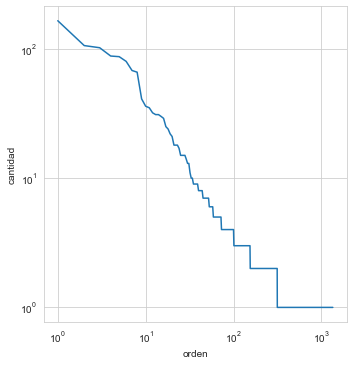

In [4]:
cuento.graficar_zipf(dimension=(5,5))

Los ejes de este gráfico están en escala logarítmica, ya que las diferencias entre la cantidad de ocurrencias de _types_ de distinto rango son muy marcadas. En escala lineal el gráfico luciría así:

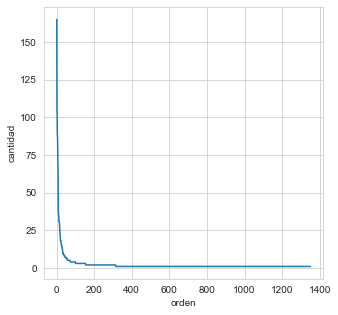

In [5]:
cuento.graficar_zipf(log=False, dimension=(5,5))

Ahora que repasamos el recuento sobre textos individuales, veamos qué podemos hacer con un corpus. En la celda de abajo seleccioné un tokenizador de nltk para que la clase corpus obtenga los tokens de cada texto. Los métodos leer_archivo y leer_directorio son bastante autoexplicativos.

In [6]:
tokenizador_palabras = nltk.tokenize.RegexpTokenizer('\w+|\$[\d\.]+|\S+')

corpus = hc.Corpus()
corpus.tokenizador_palabras = tokenizador_palabras
corpus.leer_directorio('bestiario')
corpus.leer_directorio('el_aleph')
corpus.leer_archivo('../ClasePOSTagging/facundo.txt')
corpus.leer_archivo('../ClasePOSTagging/martinfierro.txt')
corpus.leer_archivo('../ClasePOSTagging/quijote.txt')

Al igual que en la lectura de un único documento, la única metadata disponible es, en principio, la ubicación del archivo. En la celda de abajo le agregamos el autor a los textos, y verificamos que se haya ingresado correctamente.

In [7]:
display(corpus.metadata)

for documento in corpus.documentos.keys():
    if 'el_aleph' in documento:
        corpus.documentos[documento].incorporar_metadata(**{'autor':'Jorge Luis Borges'})
    if 'bestiario' in documento:
        corpus.documentos[documento].incorporar_metadata(**{'autor':'Julio Cortázar'})
    if 'facundo' in documento:
        corpus.documentos[documento].incorporar_metadata(**{'autor':'Domingo Faustino Sarmiento'})
    if 'martinfierro' in documento:
        corpus.documentos[documento].incorporar_metadata(**{'autor':'José Hernández'})
    if 'quijote' in documento:
        corpus.documentos[documento].incorporar_metadata(**{'autor':'Miguel de Cervantes Saavedra'})

corpus.actualizar_metadata()
display(corpus.metadata)

,archivo de origen
0,/home/fede/Proyectos/CursoComputacional/Clases...
1,/home/fede/Proyectos/CursoComputacional/Clases...
2,/home/fede/Proyectos/CursoComputacional/Clases...
3,/home/fede/Proyectos/CursoComputacional/Clases...
4,/home/fede/Proyectos/CursoComputacional/Clases...
5,/home/fede/Proyectos/CursoComputacional/Clases...
6,/home/fede/Proyectos/CursoComputacional/Clases...
7,/home/fede/Proyectos/CursoComputacional/Clases...
8,/home/fede/Proyectos/CursoComputacional/Clases...
9,/home/fede/Proyectos/CursoComputacional/Clases...


,archivo de origen,autor
0,/home/fede/Proyectos/CursoComputacional/Clases...,Julio Cortázar
1,/home/fede/Proyectos/CursoComputacional/Clases...,Julio Cortázar
2,/home/fede/Proyectos/CursoComputacional/Clases...,Julio Cortázar
3,/home/fede/Proyectos/CursoComputacional/Clases...,Julio Cortázar
4,/home/fede/Proyectos/CursoComputacional/Clases...,Julio Cortázar
5,/home/fede/Proyectos/CursoComputacional/Clases...,Julio Cortázar
6,/home/fede/Proyectos/CursoComputacional/Clases...,Julio Cortázar
7,/home/fede/Proyectos/CursoComputacional/Clases...,Julio Cortázar
8,/home/fede/Proyectos/CursoComputacional/Clases...,Jorge Luis Borges
9,/home/fede/Proyectos/CursoComputacional/Clases...,Jorge Luis Borges


In [8]:
corpus.metadata.autor.value_counts()

Jorge Luis Borges               17
Julio Cortázar                   8
Miguel de Cervantes Saavedra     1
José Hernández                   1
Domingo Faustino Sarmiento       1
Name: autor, dtype: int64

Acá podemos aprovechar para hacer otro ejericio parecido al anterior, pero esta vez sobre el corpus en su totalidad.

Saquen:
- La cantidad de tokens en cada texto
- La cantidad de types en cada texto
- El vocabulario total del corpus
- La cantidad de apariciones de cada type en el corpus
    
Pueden acceder a los documentos individuales usando el método documentos de la clase Corpus.

Los datos anteriores deberían ayudarnos a comprender otra ley, complementaria a la ley de Zipf: la ley de Heaps. Mientras que la ley de Zipf da cuenta de la relación entre la distribución de los distintos tokens, la ley de Heaps da cuenta de la distribución de los _types_ en función de los _tokens_.

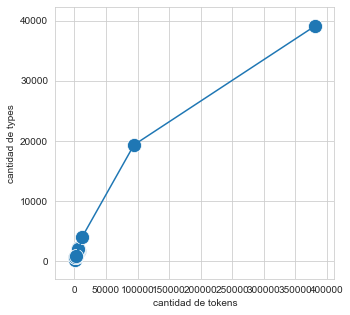

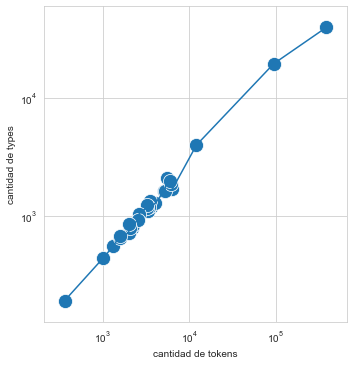

In [9]:
corpus.graficar_heaps(dimension = (5,5), log = False)
corpus.graficar_heaps(dimension = (5,5))

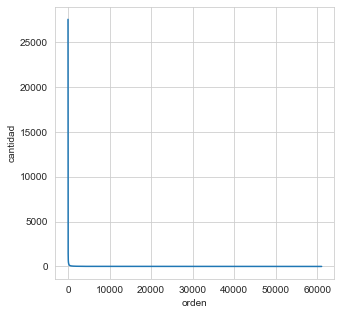

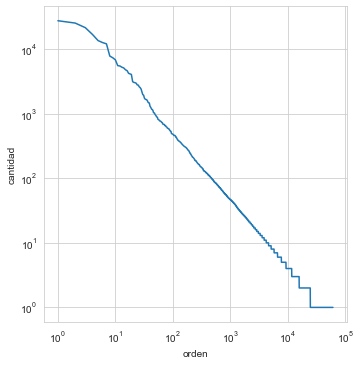

In [10]:
corpus.graficar_zipf(dimension = (5,5), log = False)
corpus.graficar_zipf(dimension = (5,5))

Para evitar sobrecargar a nuestras PCs, vamos a trabajar con un subconjunto de corpus, y nos vamos a quedar sólo con los cuentos de Cortázar.

In [11]:
subcorpus = corpus.metadata.loc[corpus.metadata.autor == 'Julio Cortázar']
lista_documentos = [corpus.documentos[documento] for documento in subcorpus['archivo de origen'].values]
subcorpus = corpus.seleccionar_subconjunto(lista_documentos)

Una de las cosas de las que hablamos es que los corpus pueden estar etiquetados. Vamos a usar el PoS tagger de la clase de Martín para etiquetar nuestro corpus.

En el gráfico de abajo podemos ver que, aunque no es tan marcada como la distribución de los tokens, las clases de palabra más frecuentes son mucho más frecuentes que las menos frecuentes.

In [ ]:
NaiveBayesTagger = pickle.load(open("NaiveBayesTagger.p", "rb"))
subcorpus.etiquetar_corpus(NaiveBayesTagger, nombre_etiqueta = 'oraciones_POStaggeadas')
subcorpus.graficar_etiquetas_por_frecuencia(nombre_etiqueta = 'oraciones_POStaggeadas', dimension=(5,10))

In [ ]:
subcorpus.contar_etiquetas_por_documento('oraciones_POStaggeadas')

La línea de arriba le asignó a cada documento del corpus el conteo correspondiente de PoS tags. Lo podemos consultar como 'conteo_oraciones_POStaggeadas' en cada documento:

In [ ]:
documentos = list(subcorpus.documentos.keys())
subcorpus.documentos[documentos[0]].conteo_oraciones_POStaggeadas

¿La distribución de clases de palabra es parecida en todos los documentos o hay diferencias notorias entre uno y otro? ¿Creen que sería similar si estuviéramos mirando textos de distintos autores?

# 3. Un poco más allá de los conteos

Podríamos estar mucho tiempo explorando la información que nos dan los recuentos sencillos, pero para que fuera provechoso tendríamos que poder charlar un poco más sobre estadística descriptiva, y eso es tema para otro curso.

Sin embargo, hay dos ideas muy importantes que parten de la posibilidad de hacer recuentos en un corpus para generalizar a otras tareas. 

Una de ellas es que si nosotros podemos contar _tokens_ individuales, también podemos contar secuencias de ellos. Eso nos posbilita empezar a calcular la probabilidad de un token dados **n** tokens precedentes. Los modelos de este tipo se llaman modelos de _n-gramas_. A este tipo de modelos criticaba Chomsky en su momento, y es cierto que razón no le faltaba. La estructura de estas secuencias es relativamente similar a la de un autómata regular, sólo que las transiciones, en lugar de ser determinísticas, están pesadas probabilísticamente. Tienen el defecto importante de que sólo pueden realizar predicciones sobre datos que ya hayan visto y, como vimos con la ley de Zipf, a medida que un texto se alarga, la cantidad de _types_ crece, y también lo hacen los distintos n-gramas. Hay muchas estrategias que se han desarrollado sobre estos modelos para mejorar su capacidad predictiva, y no nos vamos a meter con eso. Por lo pronto, pueden usar el método calcular_n_gramas de la clase Corpus o de la clase Documento para ver las frecuencias de los respectivos n-gramas.

In [ ]:
print(cuento.calcular_n_gramas(4))
print(subcorpus.calcular_n_gramas(2))

Una cosa divertida que permiten estos modelos es hacer pequeños pseudo-bots. Los bots reales son bastante mejores que lo que estamos aplicando acá, pero pueden aprovechar y probar cómo distintos tamaños de n-gramas o distintos corpus resultan en botcitos diferentes.

In [ ]:
ngrams = hc.NGramas(subcorpus, 4)

In [ ]:
print(ngrams.generar_texto())

La otra idea es que, teniendo la cantidad de apariciones de cada _type_ en un texto y la totalidad de los _types_ en un corpus, podemos representar un documento como una secuencia de números, donde cada posición está representada por un _type_ y el valor de un documento para ese _type_ es la cantidad de veces que ocurre.

Si tuviéramos un microcorpus que consistiese en las oraciones "el perro mordió al hombre" y "el hombre acarició al perro", por ejemplo, podríamos tomar el vocabulario {el, perro, mordió, al, hombre, acarició} y representar a los documentos como \[1,1,1,1,1,0\] y \[1,1,0,1,1,1\] respectivamente. 

![title](imagenes/documentterm_matrix.jpg)

Estas representaciones numéricas se llaman vectores y nos permiten operar algebraicamente, esto es, nos permiten sumar, restar y promediar representaciones. Incluso, si entendemos los vectores como líneas en el espacio, podemos medir la distancia entre cada uno por el ángulo que forman, y esto se puede interpretar de manera relativamente clara como una medida de qué tan parecidas entre sí son las entidades representadas.

![title](imagenes/similitud_manning.jpg)

Nosotros podemos tratar de ver esto desde nuestro corpus (sólo estamos viendo las primeras posiciones de cada vector):

In [ ]:
subcorpus.calcular_matriz_termino_documento().head(15).T

Y si queremos sacar las similitudes...

hc.calcular_similitudes(subcorpus.calcular_matriz_termino_documento()).head().values

Pero acá entra en juego la ley de Zipf. Si vemos la representación documento-término, podemos ver que, más allá de las cuestiones de tokenización, tenemos una cantidad enorme de comas. Si miramos los valores de la preposición "de" para cada documento, podemos confirmar que está sobrerrepresentada:

In [ ]:
subcorpus.calcular_matriz_termino_documento().T['de']

Un esquema básico pero muy muy útil para encarar este problemática es la ponderación _tf-idf_. Este esquema lo que hace es decir que el valor de cada celda en una matriz término documento corresponde a la frecuencia de la palabra correspondiente al documento (o una función de la frecuencia, puede ser una normalización sobre el total del documento o algún otro tipo de ponderación) dividida por una función de la cantidad total de documentos en los que aparece la palabra (suele ser alguna veriante del logaritmo de la división entre la cantidad total de documentos y la cantidad en la que aparece la palabra).

$$\frac{tf}{log(\frac{N}{idf})}$$

In [ ]:
tfidf = subcorpus.calcular_matriz_tf_idf()

In [ ]:
tfidf.head()

Sobre la matriz tf-idf nuevamente podemos intentar calcular las similitudes entre documentos. La ventaja de este enfoque es que las palabras que aparecen en muchos documentos aumentan el denominador, y eso hace que su valor para cada documento decrezca, mientras que en cambio si una palabra aparece pocas veces en el corpus pero muchas en un único documento está proporcionando mucha información sobre él.

Estas dos ideas, modelos de n-gramas y modelos vectoriales, son herramientas útiles por mérito propio, y también son la línea de salida para muchas de las técnicas que constituyen el estado del arte actual en procesamiento de lenguaje natural. Técnicas como _topic modeling_ y _word embeddings_ parten de esta base, pero su implementación es significativamente más compleja, con lo cual una recomendación es intentar entender cómo está funcionando esto a nivel de la implementación, para así hacer que sea más sencillo entender estas otras técnicas a un nivel conceptual.

A modo de ejercicio, intenten empezar a implementar cómo calcular tf-idf para el corpus.